In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from predcontrol_sf.control import User, Control
import predcontrol_sf.value_curves as vc
from predcontrol_sf.data_loader import load_data_bom_aus
from pathlib import Path
import datetime as dt


In [2]:
user1 = User(vc.value_curve_farmer_1, discharge_curve=vc.discharge_curve_farmer_1)
user2 = User(vc.value_curve_farmer_2)

In [3]:
ctrl = Control([user1, user2])

In [4]:
data_folder = Path(r"C:\Users\sgnodde\Documents\data\data_murray_boundary_bend")
bb_discharge = load_data_bom_aus(data_folder / 'bb_discharge.csv')
level = load_data_bom_aus(data_folder / 'bb_level.csv')
bb_pred = pd.read_csv(data_folder / 'bb_7d_disch_pred.csv', index_col='date')
bb_pred.index = pd.to_datetime(bb_pred.index)

In [5]:
bb_pred

,discharge_pred
date,
2010-03-18 00:00:00+10:00,93.655135
2010-03-18 00:15:00+10:00,93.655135
2010-03-18 00:30:00+10:00,93.655135
2010-03-18 00:45:00+10:00,93.655135
2010-03-18 01:00:00+10:00,93.655135
...,...
2022-01-09 23:00:00+10:00,200.783856
2022-01-09 23:15:00+10:00,200.783856
2022-01-09 23:30:00+10:00,200.783856


In [6]:
riverdata = pd.DataFrame({'level':level['Value'], 'discharge':bb_discharge['Value']}, index = level.index)
riverdata = riverdata.loc['2011': ]
riverdata['discharge_pred'] = bb_pred['discharge_pred']
riverdata['disch_farmer_2'] = np.NaN
riverdata['wl_farmer_1'] = np.NaN
riverdata['value'] = 0

riverdata

,level,discharge,discharge_pred,disch_farmer_2,wl_farmer_1,value
date,,,,,,
2011-01-01 00:00:00+10:00,7.216,589.060,627.547081,NaN,NaN,0
2011-01-01 00:15:00+10:00,7.227,591.173,627.547081,NaN,NaN,0
2011-01-01 00:30:00+10:00,7.218,589.444,627.547081,NaN,NaN,0
2011-01-01 00:45:00+10:00,7.224,590.596,627.547081,NaN,NaN,0
2011-01-01 01:00:00+10:00,7.213,588.485,627.547081,NaN,NaN,0
...,...,...,...,...,...,...
2022-01-17 09:15:00+10:00,3.718,217.813,NaN,NaN,NaN,0
2022-01-17 09:30:00+10:00,3.718,217.813,NaN,NaN,NaN,0
2022-01-17 09:45:00+10:00,3.717,217.735,NaN,NaN,NaN,0


In [7]:
riverdata = riverdata.dropna(subset=['level', 'discharge', 'discharge_pred'])

In [8]:
days_setting = 14
newsettingdates = [riverdata.index[4*24*days_setting]+days_setting*dt.timedelta(days=1)*i for i in range(11*int(365/days_setting))]

In [9]:
for newsettingdate in newsettingdates:
    level_weir = np.random.uniform(0,4)
    discharge = np.random.uniform(0,30)
    riverdata.loc[newsettingdate, 'wl_farmer_1'] = level_weir
    riverdata.loc[newsettingdate,'disch_farmer_2'] = discharge
riverdata

C:\Users\sgnodde\Anaconda3\envs\prediction_and_neat\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,level,discharge,discharge_pred,disch_farmer_2,wl_farmer_1,value
date,,,,,,
2011-01-01 00:00:00+10:00,7.216,589.060,627.547081,NaN,NaN,0
2011-01-01 00:15:00+10:00,7.227,591.173,627.547081,NaN,NaN,0
2011-01-01 00:30:00+10:00,7.218,589.444,627.547081,NaN,NaN,0
2011-01-01 00:45:00+10:00,7.224,590.596,627.547081,NaN,NaN,0
2011-01-01 01:00:00+10:00,7.213,588.485,627.547081,NaN,NaN,0
...,...,...,...,...,...,...
2022-01-09 23:00:00+10:00,3.802,224.386,200.783856,NaN,NaN,0
2022-01-09 23:15:00+10:00,3.805,224.622,200.783856,NaN,NaN,0
2022-01-09 23:30:00+10:00,3.806,224.700,200.783856,NaN,NaN,0


In [10]:
import neat

In [11]:
generation = 0

In [60]:
def norm_input(value, min, max):
    return (value-min) / (max-min)

max_level = riverdata['level'].max()
min_level = riverdata['level'].min()
max_disch_pred = riverdata['discharge_pred'].max()
min_disch_pred = riverdata['discharge_pred'].min()

In [79]:
config_path = "config_expl.txt"
config = neat.config.Config(neat.DefaultGenome,
                            neat.DefaultReproduction,
                            neat.DefaultSpeciesSet,
                            neat.DefaultStagnation,
                            config_path)

In [80]:
# inputs = water level, discharge now (will be more)

In [87]:
def run_control(genomes, config):
    # Init NEAT
    nets = []
    controls = []

    for id, g in genomes:
        net = neat.nn.FeedForwardNetwork.create(g, config)
        nets.append(net)
        g.fitness = 0

        # Init my cars
        controls.append(Control([user1, user2]))


    # Main loop
    global generation
    generation += 1

    enum_nsd = iter(newsettingdates)
    ind = next(enum_nsd)

    while True:
        
        # Input my data and get result from network
        lev_r = norm_input(riverdata['level'][ind], min_level, max_level)
        disch_pred = norm_input(riverdata['discharge_pred'][ind], min_disch_pred, max_disch_pred)



        for i, control in enumerate(controls):
            output = nets[i].activate([lev_r, disch_pred])
            
            #print(f"Output: {output}")
            out_1, out_2 = output
            wl_1 = vc.translation_curve(out_1, 1., 9., in_min=-1., in_max=1.)
            dis_2 = vc.translation_curve(out_2, 0., 50., in_min=-1., in_max=1.)

            level_input = riverdata['level'][ind:ind+dt.timedelta(days=14)].values
            disch_input = riverdata['discharge'][ind:ind+dt.timedelta(days=14)].values
            value = control.return_total_value(
                                    level_input,
                                    disch_input,
                                    [None, dis_2*np.ones_like(level_input)],
                                    [wl_1*np.ones_like(level_input), None],
                                    vc.penalty_curve_low_discharge)
            if wl_1 < 1.3:
                value -= 1_000
           
            genomes[i][1].fitness += value

        ind = next(enum_nsd)
        if ind == newsettingdates[-1]:
            break

In [88]:
p = neat.Population(config)

# Add reporter for fancy statistical result
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

# Run NEAT

p.run(run_control, 50)


 ****** Running generation 0 ****** 



c:\users\sgnodde\documents\git\str-flow-pred-and-control\predcontrol_sf\physics.py:14: RuntimeWarning: invalid value encountered in power
  q = 2 / 3 * cd * b * (2 * g) ** 0.5 * h ** 1.5


Population's average fitness: -29620597.86034 stdev: 30317870.87273
Best fitness: 7721771.74146 - size: (2, 4) - species 1 - id 25
Average adjusted fitness: 0.592
Mean genetic distance 1.359, standard deviation 0.351
Population of 80 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    80  7721771.7    0.592     0
Total extinctions: 0
Generation time: 29.267 sec

 ****** Running generation 1 ****** 

Population's average fitness: -4601412.94170 stdev: 17001819.36795
Best fitness: 8263137.21507 - size: (2, 3) - species 1 - id 137
Average adjusted fitness: 0.859
Mean genetic distance 1.466, standard deviation 0.404
Population of 80 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    80  8263137.2    0.859     0
Total extinctions: 0
Generation time: 29.310 sec (29.288 average)

 ****** Running generation 2 ****** 

Population's average fitness: -5408846.

KeyboardInterrupt: 

In [83]:
import warnings
def plot_stats(statistics, ylog=False, view=False, filename='avg_fitness.svg'):
    """ Plots the population's average and best fitness. """
    if plt is None:
        warnings.warn("This display is not available due to a missing optional dependency (matplotlib)")
        return

    generation = range(len(statistics.most_fit_genomes))
    best_fitness = [c.fitness for c in statistics.most_fit_genomes]
    avg_fitness = np.array(statistics.get_fitness_mean())
    stdev_fitness = np.array(statistics.get_fitness_stdev())

    plt.plot(generation, avg_fitness, 'b-', label="average")
    plt.plot(generation, avg_fitness - stdev_fitness, 'g-.', label="-1 sd")
    plt.plot(generation, avg_fitness + stdev_fitness, 'g-.', label="+1 sd")
    plt.plot(generation, best_fitness, 'r-', label="best")

    plt.title("Population's average and best fitness")
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.grid()
    plt.legend(loc="best")
    if ylog:
        plt.gca().set_yscale('symlog')

    plt.savefig(filename)
    if view:
        plt.show()

    plt.close()

In [84]:
plot_stats(stats, filename='v19_400x.svg')

In [89]:
best_genome = stats.best_genome()
best_genome.fitness

8263137.2150664795

## Getraind model aan het werk

### How to use input and output

In: `output = nets[i].activate([dis, lev])`

Out: `dis_2, wl_1 = output`

In [75]:
# TODO: save to file as well
net = neat.nn.FeedForwardNetwork.create(best_genome, config)
out_1, out_2 = net.activate([5.0,10])
wl_1 = vc.translation_curve(out_1, 1., 9.)
dis_2 = vc.translation_curve(out_2, 0, 50)
print(f"Optimal weir level: {wl_1} m")
print(f"Optimal discharge setting: {dis_2} m^3/s")

Optimal weir level: 5.0 m
Optimal discharge setting: 14.999797377471063 m^3/s


In [76]:
vc.discharge_curve_farmer_1(5.5,4.5,2)

5.902918298980975

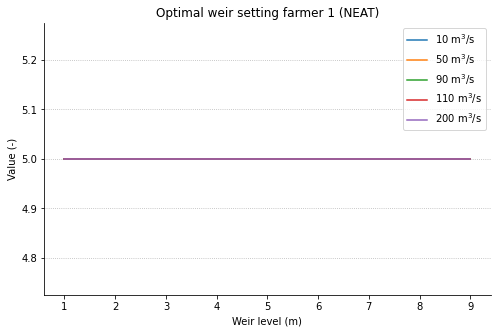

In [90]:
river_levels = np.linspace(1,9,50)

discharge_predictions=[10, 50, 90, 110, 200]
plt.figure(figsize=(8,5))
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Optimal weir setting farmer 1 (NEAT)')
plt.xlabel('Weir level (m)')
plt.ylabel('Value (-)')
plt.grid(linestyle= ':', axis='y')

opt_lev = [[vc.translation_curve(net.activate([norm_input(i, min_level, max_level),norm_input(j, min_disch_pred, max_disch_pred)])[0], 1., 9.) for i in river_levels] for j in discharge_predictions]
for i, opt_lev_single in enumerate(opt_lev):
    plt.plot(river_levels, opt_lev_single, label = f"{discharge_predictions[i]} m$^3$/s")
plt.legend()
plt.savefig(r"C:\Users\sgnodde\Documents\data\Murray project\OUTPUT_FARM_1_v4.png", dpi=200)

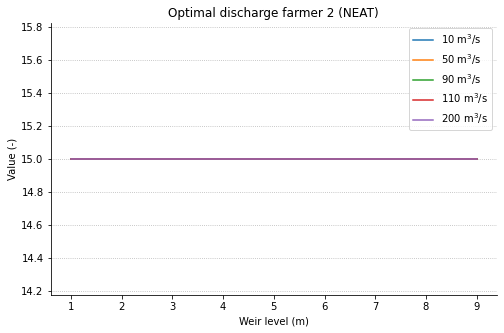

In [93]:
river_levels = np.linspace(1,9,50)
discharge_predictions=[10, 50, 90, 110, 200]

plt.figure(figsize=(8,5))
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Optimal discharge farmer 2 (NEAT)')
plt.xlabel('Weir level (m)')

plt.ylabel('Value (-)')
plt.grid(linestyle= ':', axis='y')

opt_lev = [[vc.translation_curve(net.activate([norm_input(i, min_level, max_level),norm_input(j, min_disch_pred, max_disch_pred)])[1], 0, 50) for i in river_levels] for j in discharge_predictions]
for i, opt_lev_single in enumerate(opt_lev):
    plt.plot(river_levels, opt_lev_single, label = f"{discharge_predictions[i]} m$^3$/s")
plt.legend()
plt.savefig(r"C:\Users\sgnodde\Documents\data\Murray project\OUTPUT_FARM_2_v4.png", dpi=200)


In [94]:
net.activate([-1,-1])

[0.0, -0.40000810490115746]

In [95]:
net.activate([1,1])

[0.0, -0.40000810490115746]

<AxesSubplot:>

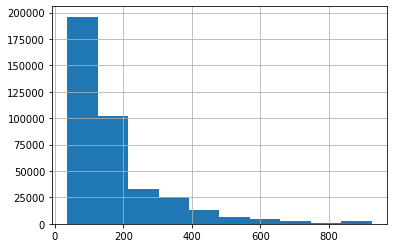

In [39]:
riverdata['discharge_pred'].hist()